In [13]:
import numpy as np

In [55]:
S=np.array([[1,0,0],[0,3,-1],[0,-1,3]])

In [56]:
S

array([[ 1,  0,  0],
       [ 0,  3, -1],
       [ 0, -1,  3]])

In [15]:
np.linalg.eigvals(S)

array([4., 2., 1.])

In [16]:
Sp, Q = np.linalg.eig(S)

In [17]:
Q

array([[ 0.        ,  0.        ,  1.        ],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ]])

In [18]:
Sp

array([4., 2., 1.])

In [20]:
np.linalg.inv(Q)

array([[-0.        , -0.70710678,  0.70710678],
       [ 0.        ,  0.70710678,  0.70710678],
       [ 1.        ,  0.        ,  0.        ]])

In [57]:
np.dot(Q.T,np.dot(S,Q))

array([[4.00000000e+00, 4.47422863e-17, 0.00000000e+00],
       [8.94845727e-17, 2.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [22]:
def compaction(pore_pressure, phi):
    depth = 2
    Sv = 23.0 * 2.0
    return phi -  0.386 * np.exp(-3.13 * 10 ** (-2) *(Sv-pore_pressure))

In [23]:
import scipy.optimize as so

In [24]:
so.fsolve(compaction, 46, (0.26,))

array([33.37521602])

In [25]:
x = np.linspace(0.1,0.4,20)

In [26]:
y = np.array([so.fsolve(compaction, 46, (i,)) for i in x])

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

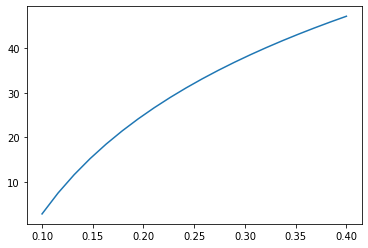

In [28]:
plt.plot(x,y)

Strike slip faulting

In [43]:
alpha=0 # Azimuth of Shmin, S1=SHmax, S2=Sv
beta=0
gama=np.pi/2

Normal faulting

In [42]:
alpha=0 # Azimuth of Shmin, S1=Sv
beta=np.pi/2
gama=0

In [44]:
R_G = np.array([[np.cos(alpha)*np.cos(beta),np.sin(alpha)*np.cos(beta),-np.sin(beta)],[np.cos(alpha)*np.sin(beta)*np.sin(gama)-np.sin(alpha)*np.cos(gama),np.sin(alpha)*np.sin(beta)*np.sin(gama)+np.cos(alpha)*np.cos(gama),np.cos(beta)*np.sin(alpha)],[np.cos(alpha)*np.sin(beta)*np.cos(gama)+np.sin(alpha)*np.sin(gama),np.sin(alpha)*np.sin(beta)*np.cos(gama)-np.cos(alpha)*np.sin(gama),np.cos(beta)*np.cos(gama)]])

In [49]:
R_G

array([[ 0.000000e+00,  0.000000e+00, -1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  0.000000e+00],
       [ 1.000000e+00,  0.000000e+00,  6.123234e-17]])

In [48]:
R_G[0][2]=-1
R_G[0][0]=0
R_G[1][1]=1
R_G[2][0]=1
R_G[2][1]=0

In [50]:
Rgt = R_G.T

In [51]:
S=np.array([[30,0,0],[0,25,0],[0,0,20]])

In [52]:
np.dot(S,R_G)

array([[ 0.0000000e+00,  0.0000000e+00, -3.0000000e+01],
       [ 0.0000000e+00,  2.5000000e+01,  0.0000000e+00],
       [ 2.0000000e+01,  0.0000000e+00,  1.2246468e-15]])

In [53]:
np.dot(Rgt,np.dot(S,R_G))

array([[2.0000000e+01, 0.0000000e+00, 1.2246468e-15],
       [0.0000000e+00, 2.5000000e+01, 0.0000000e+00],
       [1.2246468e-15, 0.0000000e+00, 3.0000000e+01]])